# Couple model

This notebook goes through the solution and simulation of the single model. 

We ensure the correctness of the solution by visualizing consumption and value functions and calculating Euler errors.

We ensure the empirical validity of the model by simulating a lifecycle and calculating retirement probabilities

Finally we time the model and simulation

### Setup

In [4]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=8)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import funs
import figs

# Global modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
test = RetirementClass(couple=True)
test.solve()

In [11]:
import time
tic = time.time()
test.solve()
toc = time.time()
print(toc-tic)

14.894458770751953


# Consumption and value functions

### We consider a household with zero age difference, where both are eligible to erp and high skilled

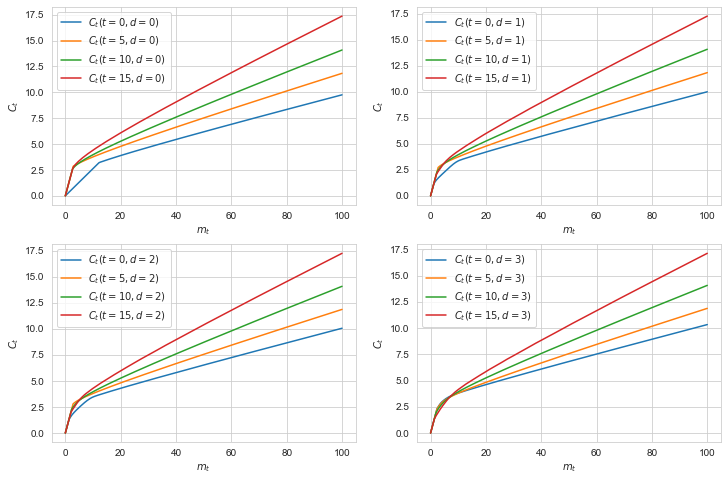

In [30]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy(test,axs[0,0],var='c',time=time[::5],age_dif=[1],male=[2],states=[2],choice=[0],label=True)
figs.policy(test,axs[0,1],var='c',time=time[::5],age_dif=[1],male=[2],states=[2],choice=[1],label=True)
figs.policy(test,axs[1,0],var='c',time=time[::5],age_dif=[1],male=[2],states=[2],choice=[2],label=True)
figs.policy(test,axs[1,1],var='c',time=time[::5],age_dif=[1],male=[2],states=[2],choice=[3],label=True)
plt.show()

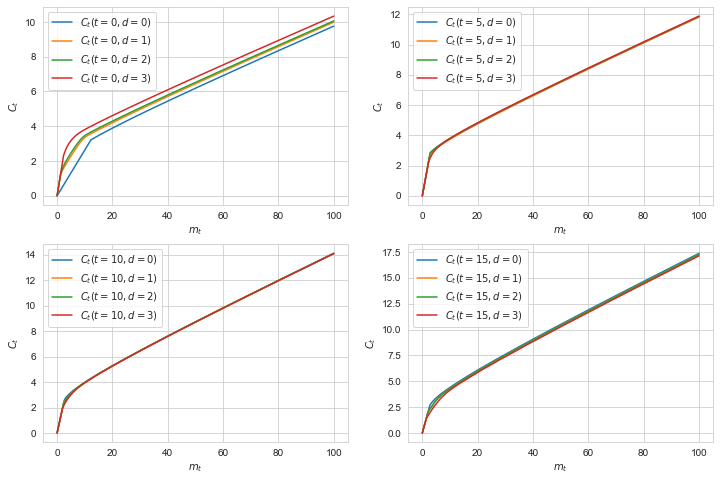

In [31]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.policy(test,axs[0,0],var='c',time=[0],age_dif=[1],male=[2],states=[2],choice=[0,1,2,3],label=True)
figs.policy(test,axs[0,1],var='c',time=[5],age_dif=[1],male=[2],states=[2],choice=[0,1,2,3],label=True)
figs.policy(test,axs[1,0],var='c',time=[10],age_dif=[1],male=[2],states=[2],choice=[0,1,2,3],label=True)
figs.policy(test,axs[1,1],var='c',time=[15],age_dif=[1],male=[2],states=[2],choice=[0,1,2,3],label=True)
plt.show()

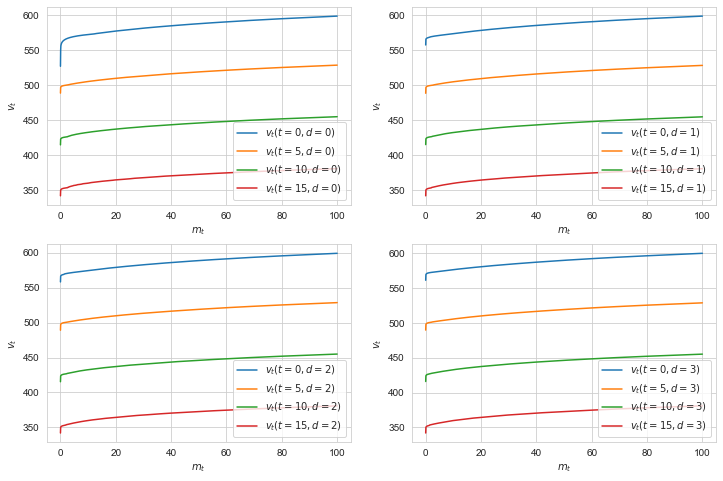

In [32]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
time = list(range(20))
figs.policy(test,axs[0,0],var='v',time=time[::5],age_dif=[1],male=[2],states=[2],choice=[0],label=True)
figs.policy(test,axs[0,1],var='v',time=time[::5],age_dif=[1],male=[2],states=[2],choice=[1],label=True)
figs.policy(test,axs[1,0],var='v',time=time[::5],age_dif=[1],male=[2],states=[2],choice=[2],label=True)
figs.policy(test,axs[1,1],var='v',time=time[::5],age_dif=[1],male=[2],states=[2],choice=[3],label=True)
plt.show()

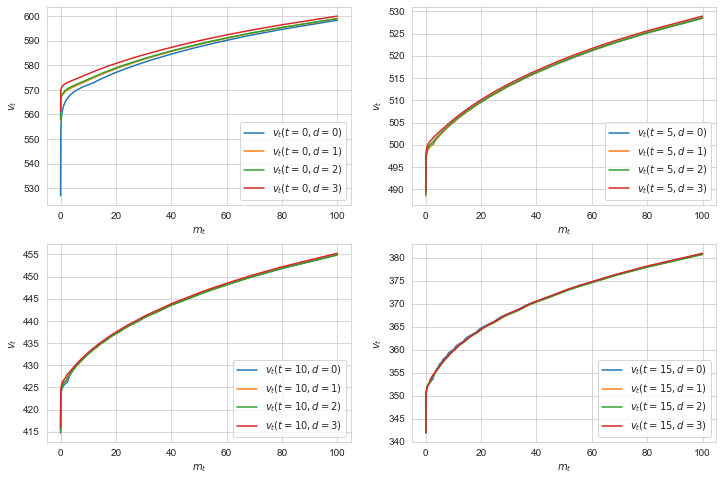

In [33]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.policy(test,axs[0,0],var='v',time=[0],age_dif=[1],male=[2],states=[2],choice=[0,1,2,3],label=True)
figs.policy(test,axs[0,1],var='v',time=[5],age_dif=[1],male=[2],states=[2],choice=[0,1,2,3],label=True)
figs.policy(test,axs[1,0],var='v',time=[10],age_dif=[1],male=[2],states=[2],choice=[0,1,2,3],label=True)
figs.policy(test,axs[1,1],var='v',time=[15],age_dif=[1],male=[2],states=[2],choice=[0,1,2,3],label=True)
plt.show()

### Average retirement probabilitites

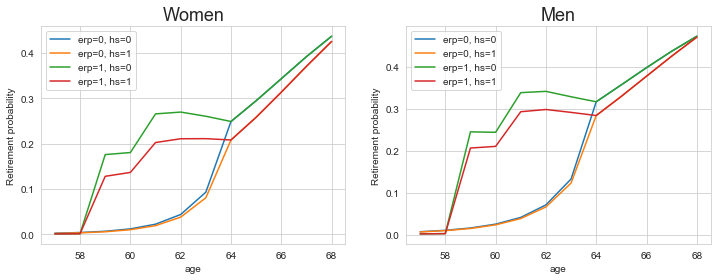

In [5]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.choice_probs(test,axs[0],ad=0,ma=0,states=[0,1,2,3])
figs.choice_probs(test,axs[1],ad=0,ma=1,states=[0,1,2,3])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

### Pension benefits paths

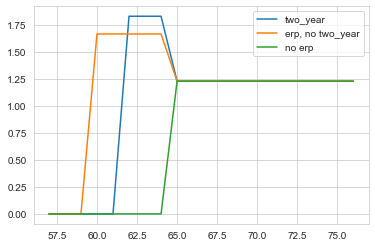

In [7]:
par = test.par
name = ['two_year', 'erp, no two_year', 'no erp']
zoom = 20
for erp in [0,1,2]:
    plt.plot(np.arange(par.start_T,par.start_T+zoom), par.pension_in[:zoom,0,0,erp,100], label=name[erp])
plt.legend()

# Euler errors

### Plotting across states

Total: -3.7387045381270547


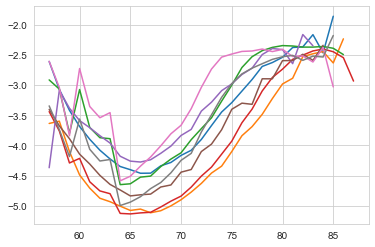

In [16]:
male = [0,1]
states = [0,1,2,3]
ages = [test.par.start_T,test.par.end_T-1]
for ma in male:
    for st in states:
        funs.log_euler(test,male=[ma],states=[st],ages=ages,plot=True)
print('Total:',funs.log_euler(test,ages=ages)[0])

### Can euler errors be improved?

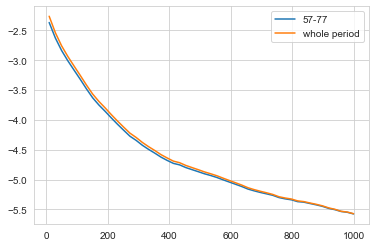

In [57]:
funs.resolve(test,Na=np.linspace(10,1000))
test.par.Na = 190
test.solve(recompute=True) # reset

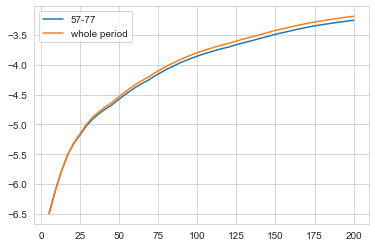

In [58]:
funs.resolve(test,a_max = np.linspace(5,200))
test.par.a_max = 100
test.solve(recompute=True) # reset

# Simulation

### Initialized wealth distribution

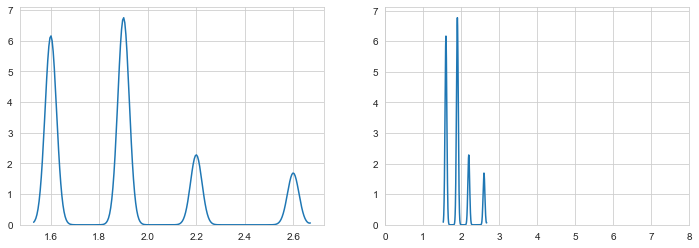

median: 1.9
mean:   1.901
std:    0.307


In [9]:
M_init = test.sim.m[0]
fig, axs = plt.subplots(1,2,figsize=(12,4))
sns.kdeplot(M_init,ax=axs[0],gridsize=200)
axs[1].set_xlim(0,8)
sns.kdeplot(M_init,ax=axs[1],gridsize=500)
plt.show()
print('median:',np.round(np.median(M_init),3))
print('mean:  ',np.round(np.mean(M_init),3))
print('std:   ',np.round(np.std(M_init),3))

### Lifecycle

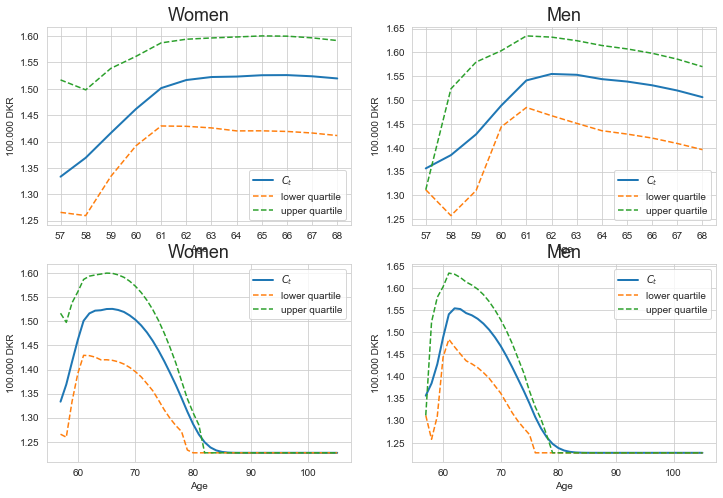

In [10]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.lifecycle(test,axs[0,0],male=0,vars=['c'])
figs.lifecycle(test,axs[0,1],male=1,vars=['c'])
figs.lifecycle(test,axs[1,0],male=0,vars=['c'],ages=[57,110])
figs.lifecycle(test,axs[1,1],male=1,vars=['c'],ages=[57,110])
axs[0,0].set_title('Women',size=18)
axs[0,1].set_title('Men',size=18)
axs[1,0].set_title('Women',size=18)
axs[1,1].set_title('Men',size=18)
plt.show()

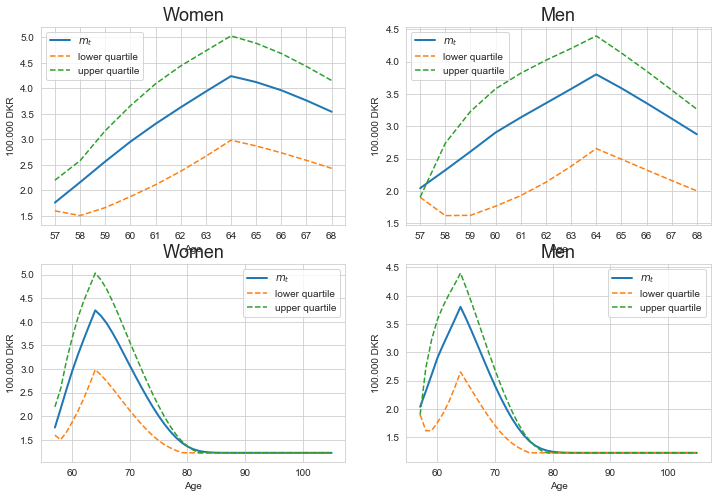

In [11]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.lifecycle(test,axs[0,0],male=0,vars=['m'])
figs.lifecycle(test,axs[0,1],male=1,vars=['m'])
figs.lifecycle(test,axs[1,0],male=0,vars=['m'],ages=[57,110])
figs.lifecycle(test,axs[1,1],male=1,vars=['m'],ages=[57,110])
axs[0,0].set_title('Women',size=18)
axs[0,1].set_title('Men',size=18)
axs[1,0].set_title('Women',size=18)
axs[1,1].set_title('Men',size=18)
plt.show()

### Retirement

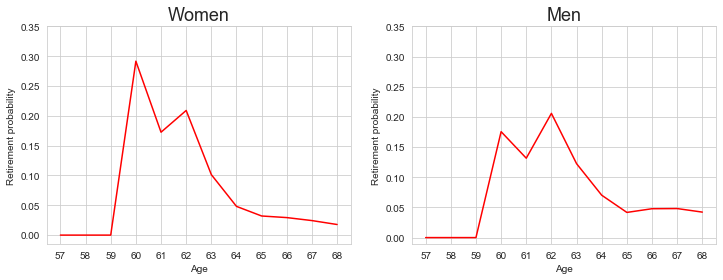

In [12]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.retirement_probs(test,axs[0],male=1,states=[0,1,2,3])
figs.retirement_probs(test,axs[1],male=0,states=[0,1,2,3])
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

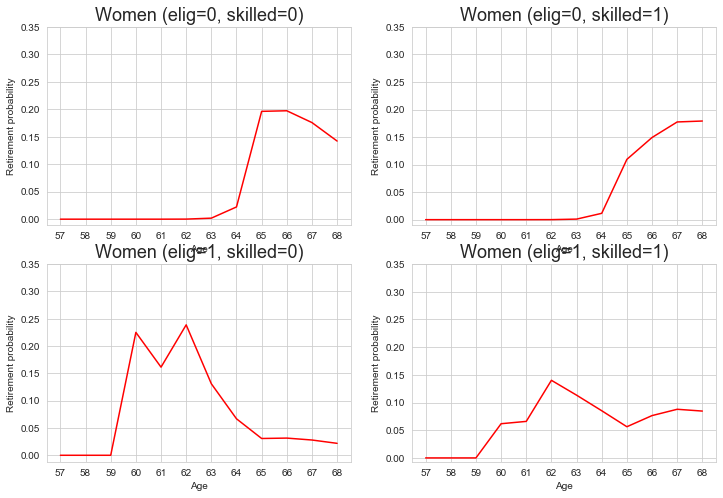

In [13]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.retirement_probs(test,axs[0,0],male=0,states=[0])
figs.retirement_probs(test,axs[0,1],male=0,states=[1])
figs.retirement_probs(test,axs[1,0],male=0,states=[2])
figs.retirement_probs(test,axs[1,1],male=0,states=[3])
axs[0,0].set_title('Women (elig=0, skilled=0)',size=18)
axs[0,1].set_title('Women (elig=0, skilled=1)',size=18)
axs[1,0].set_title('Women (elig=1, skilled=0)',size=18)
axs[1,1].set_title('Women (elig=1, skilled=1)',size=18)
plt.show()

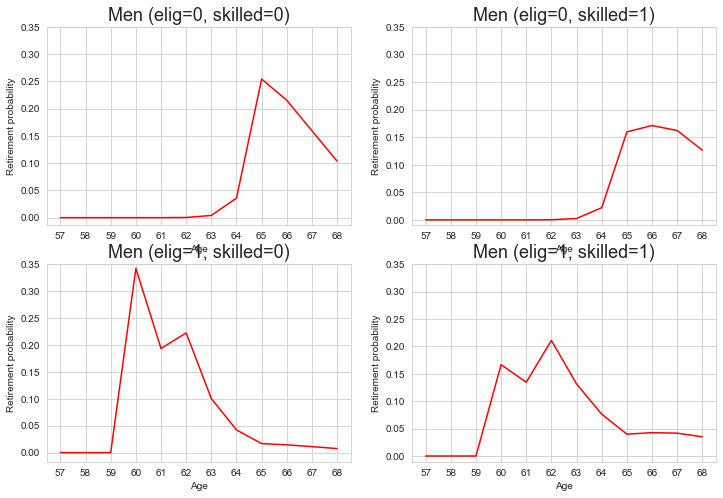

In [14]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.retirement_probs(test,axs[0,0],male=1,states=[0])
figs.retirement_probs(test,axs[0,1],male=1,states=[1])
figs.retirement_probs(test,axs[1,0],male=1,states=[2])
figs.retirement_probs(test,axs[1,1],male=1,states=[3])
axs[0,0].set_title('Men (elig=0, skilled=0)',size=18)
axs[0,1].set_title('Men (elig=0, skilled=1)',size=18)
axs[1,0].set_title('Men (elig=1, skilled=0)',size=18)
axs[1,1].set_title('Men (elig=1, skilled=1)',size=18)
plt.show()

# Time the model and simulation

In [7]:
test = RetirementClass(couple=False)
test.par.simT=20

In [8]:
def solve():
    test.solve() 
    
def simulate():
    test.simulate()
    
funcs = [solve,simulate]
argu = dict([(funcs[0], []),
             (funcs[1], [])])
names = dict([(funcs[0], 'solve: #a=' + str(test.par.poc+test.par.Na)),
              (funcs[1], 'simulate: T=20, N=' + str(test.par.simN))])

In [10]:
funs.my_timer(funcs,argu,names,unit='s',ndigits=2,Ntimes=10)

time unit is: s
+--------------------------+------+--------+------+------+-------+
|           func           |  lq  | median | mean |  uq  | neval |
+--------------------------+------+--------+------+------+-------+
|      solve: #a=200       | 1.06 |  1.07  | 1.1  | 1.12 |  10.0 |
| simulate: T=20, N=100000 | 1.44 |  1.45  | 1.45 | 1.46 |  10.0 |
+--------------------------+------+--------+------+------+-------+


In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=8)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import funs
import figs

# Global modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = RetirementClass(couple=False)
test.par.simT=20

In [3]:
def solve():
    test.solve() 
    
def simulate():
    test.simulate()
    
funcs = [solve,simulate]
argu = dict([(funcs[0], []),
             (funcs[1], [])])
names = dict([(funcs[0], 'solve: #a=' + str(test.par.poc+test.par.Na)),
              (funcs[1], 'simulate: T=20, N=' + str(test.par.simN))])

In [6]:
funs.my_timer(funcs,argu,names,unit='s',ndigits=2,Ntimes=10)

time unit is: s
+--------------------------+------+--------+------+------+-------+
|           func           |  lq  | median | mean |  uq  | neval |
+--------------------------+------+--------+------+------+-------+
|      solve: #a=200       | 1.02 |  1.02  | 1.03 | 1.03 |  10.0 |
| simulate: T=20, N=100000 | 1.38 |  1.4   | 1.42 | 1.45 |  10.0 |
+--------------------------+------+--------+------+------+-------+
